# 1. IMPORT AND INSTALL DEPENDENCIES

In [98]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [99]:
import cv2 
import numpy as np
import os
from matplotlib import pyplot as plt
import time 
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [100]:
mp_holistic = mp.solutions.holistic # Holistic model - to make detection
mp_drawing = mp.solutions.drawing_utils # Drawing utilities - to draw

In [101]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                # Make prediction
    image.flags.writeable = True                   # Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR CONVERSION RGB 2 BGR 
    return image, results

In [102]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left-hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right-hand connections
     

In [103]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks,  mp.solutions.face_mesh.FACEMESH_CONTOURS,
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             )
    
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                               mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             )
    
    # Draw left-hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
   # Draw right-hand connections 
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )
     

In [104]:
#mp_drawing.draw_landmarks??

In [105]:
#mp_holistic.POSE_CONNECTIONS

In [106]:
# to capture the video from webcam
cap = cv2.VideoCapture(0)
#Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read Feedq
        ret, frame = cap.read()

        # make prediction
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        #draw landmarks
        draw_styled_landmarks(image, results)
        
        #show to screen 
        cv2.imshow('OpenCV Feed' , image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [107]:
len(results.face_landmarks.landmark)

468

In [108]:
results

mediapipe.python.solution_base.SolutionOutputs

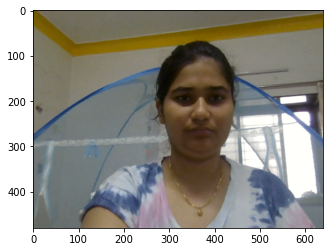

In [109]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [110]:
draw_landmarks(frame, results)

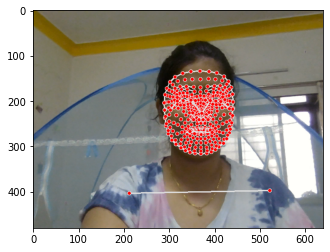

In [111]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract keypoint Values

In [112]:
results.face_landmarks

landmark {
  x: 0.5797717571258545
  y: 0.5406644940376282
  z: -0.03164611756801605
}
landmark {
  x: 0.5805673003196716
  y: 0.4941025376319885
  z: -0.055299438536167145
}
landmark {
  x: 0.5795409679412842
  y: 0.5101145505905151
  z: -0.030358703806996346
}
landmark {
  x: 0.5711432099342346
  y: 0.44384175539016724
  z: -0.039655812084674835
}
landmark {
  x: 0.5805953741073608
  y: 0.47797703742980957
  z: -0.05819205194711685
}
landmark {
  x: 0.5801203846931458
  y: 0.4574996531009674
  z: -0.05329113453626633
}
landmark {
  x: 0.5784174203872681
  y: 0.4097349941730499
  z: -0.0229681134223938
}
landmark {
  x: 0.5040386319160461
  y: 0.4113383889198303
  z: 0.01474153995513916
}
landmark {
  x: 0.5777102112770081
  y: 0.375712513923645
  z: -0.014190249145030975
}
landmark {
  x: 0.577639102935791
  y: 0.35533949732780457
  z: -0.015275922603905201
}
landmark {
  x: 0.5760598182678223
  y: 0.281061589717865
  z: -5.89158917136956e-05
}
landmark {
  x: 0.5797617435455322
  y:

In [113]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)

In [114]:
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)

In [115]:
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)

In [116]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [117]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    
    return np.concatenate([pose,face,lh,rh])

In [118]:
result_test = extract_keypoints(results)
result_test

array([ 0.58269918,  0.47339997, -1.36312771, ...,  0.        ,
        0.        ,  0.        ])

In [119]:
np.save('0',result_test)

In [120]:
np.load('0.npy')

array([ 0.58269918,  0.47339997, -1.36312771, ...,  0.        ,
        0.        ,  0.        ])

In [121]:
print(results)
print(results.pose_landmarks)
print(results.left_hand_landmarks)
print(results.right_hand_landmarks)
print(results.face_landmarks)


<class 'mediapipe.python.solution_base.SolutionOutputs'>
landmark {
  x: 0.582699179649353
  y: 0.47339996695518494
  z: -1.3631277084350586
  visibility: 0.99984210729599
}
landmark {
  x: 0.6119974851608276
  y: 0.41534969210624695
  z: -1.2867801189422607
  visibility: 0.9996882677078247
}
landmark {
  x: 0.6303397417068481
  y: 0.4169890582561493
  z: -1.2870948314666748
  visibility: 0.9997465014457703
}
landmark {
  x: 0.6478044390678406
  y: 0.41906532645225525
  z: -1.2869737148284912
  visibility: 0.9995905160903931
}
landmark {
  x: 0.5445469617843628
  y: 0.41308727860450745
  z: -1.293637752532959
  visibility: 0.9997292160987854
}
landmark {
  x: 0.518467366695404
  y: 0.41504356265068054
  z: -1.293384075164795
  visibility: 0.9997944831848145
}
landmark {
  x: 0.4983435273170471
  y: 0.4176202118396759
  z: -1.293826699256897
  visibility: 0.9997351169586182
}
landmark {
  x: 0.678014874458313
  y: 0.4529098570346832
  z: -0.8028962016105652
  visibility: 0.9997030496597

# 4. Set Folders for Collection

In [122]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [123]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5 .Collect Keypoint Values for Training and Testing 

In [124]:
# to capture the video from webcam
cap = cv2.VideoCapture(0)
#Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    #NEW LOOP
    #loop through actions
    for action in actions:
        #loop through sequences aka videos
        for sequence in range(no_sequences):
            #loop through video length aka sequence length
            for frame_num in range(sequence_length):
                

                # Read Feedq
                ret, frame = cap.read()

                # make prediction
                image, results = mediapipe_detection(frame, holistic)
                print(results)

                #draw landmarks
                draw_styled_landmarks(image, results)

                
                # NEW : Apply wait logic
                if frame_num == 0:
                    cv2.putText(image,'STARTING COLLECTION', (120,200),
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action,sequence), (15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image,'Collecting frame for {} Video Number {}'.format(action, sequence), (15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                
            
                #NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH,action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints) 
                
                #show to screen 
                cv2.imshow('OpenCV Feed' , image)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [125]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [126]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [127]:
label_map = {label:num for num, label in enumerate(actions)}

In [128]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [129]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [130]:
np.array(sequences).shape

(90, 30, 1662)

In [131]:
np.array(labels).shape

(90,)

In [132]:
X = np.array(sequences)

In [133]:
X.shape 

(90, 30, 1662)

In [134]:
y = to_categorical(labels).astype(int)

In [135]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.05)

In [137]:
X_train.shape

(85, 30, 1662)

In [138]:
X_test.shape

(5, 30, 1662)

# 7. Building and Training LSTM Neural Networking

In [139]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [140]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir = log_dir)

In [151]:
model = Sequential()
model.add(LSTM(64, return_sequences = True , activation='relu', input_shape=(30,1662) ))
model.add(LSTM(128, return_sequences = True , activation='relu' ))
model.add(LSTM(64, return_sequences = False , activation='relu' ))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation= 'softmax'))

In [152]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [143]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 3s 489ms/step - loss: 1.1114 - categorical_accuracy: 0.3327
Epoch 2/2000
3/3 [==============================] - 0s 49ms/step - loss: 6.2662 - categorical_accuracy: 0.4304
Epoch 3/2000
3/3 [==============================] - 0s 49ms/step - loss: 8.4298 - categorical_accuracy: 0.4657
Epoch 4/2000
3/3 [==============================] - 0s 52ms/step - loss: 11.5997 - categorical_accuracy: 0.1722
Epoch 5/2000
3/3 [==============================] - 0s 47ms/step - loss: 12.6405 - categorical_accuracy: 0.3483
Epoch 6/2000
3/3 [==============================] - 0s 45ms/step - loss: 27.7009 - categorical_accuracy: 0.3112
Epoch 7/2000
3/3 [==============================] - 0s 46ms/step - loss: 22.1406 - categorical_accuracy: 0.3170
Epoch 8/2000
3/3 [==============================] - 0s 42ms/step - loss: 16.6281 - categorical_accuracy: 0.3385
Epoch 9/2000
3/3 [==============================] - 0s 47ms/step - loss: 21.2108 - categorical_accuracy: 0

3/3 [==============================] - 0s 46ms/step - loss: 1.3196 - categorical_accuracy: 0.2897
Epoch 75/2000
3/3 [==============================] - 0s 44ms/step - loss: 1.2065 - categorical_accuracy: 0.3386
Epoch 76/2000
3/3 [==============================] - 0s 45ms/step - loss: 1.1394 - categorical_accuracy: 0.4599
Epoch 77/2000
3/3 [==============================] - 0s 45ms/step - loss: 1.0720 - categorical_accuracy: 0.3914
Epoch 78/2000
3/3 [==============================] - 0s 44ms/step - loss: 1.5625 - categorical_accuracy: 0.3914
Epoch 79/2000
3/3 [==============================] - 0s 45ms/step - loss: 1.7382 - categorical_accuracy: 0.4051
Epoch 80/2000
3/3 [==============================] - 0s 44ms/step - loss: 1.5517 - categorical_accuracy: 0.3288
Epoch 81/2000
3/3 [==============================] - 0s 45ms/step - loss: 1.7063 - categorical_accuracy: 0.4051
Epoch 82/2000
3/3 [==============================] - 0s 45ms/step - loss: 1.2837 - categorical_accuracy: 0.4521
Epoch 

3/3 [==============================] - 0s 44ms/step - loss: 1.1308 - categorical_accuracy: 0.4579
Epoch 147/2000
3/3 [==============================] - 0s 42ms/step - loss: 1.1054 - categorical_accuracy: 0.3034
Epoch 148/2000
3/3 [==============================] - 0s 42ms/step - loss: 1.0311 - categorical_accuracy: 0.4325
Epoch 149/2000
3/3 [==============================] - 0s 44ms/step - loss: 1.0184 - categorical_accuracy: 0.3816
Epoch 150/2000
3/3 [==============================] - 0s 44ms/step - loss: 1.0402 - categorical_accuracy: 0.4677
Epoch 151/2000
3/3 [==============================] - 0s 43ms/step - loss: 1.0489 - categorical_accuracy: 0.3367
Epoch 152/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.9944 - categorical_accuracy: 0.4736
Epoch 153/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.9801 - categorical_accuracy: 0.5029
Epoch 154/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.9960 - categorical_accuracy: 0.485

3/3 [==============================] - 0s 43ms/step - loss: 0.7634 - categorical_accuracy: 0.6927
Epoch 219/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.7204 - categorical_accuracy: 0.7083
Epoch 220/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.6285 - categorical_accuracy: 0.7299
Epoch 221/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.5758 - categorical_accuracy: 0.6790
Epoch 222/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.5452 - categorical_accuracy: 0.7123
Epoch 223/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.5036 - categorical_accuracy: 0.6790
Epoch 224/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.5082 - categorical_accuracy: 0.6810
Epoch 225/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.5120 - categorical_accuracy: 0.6008
Epoch 226/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.5056 - categorical_accuracy: 0.628

3/3 [==============================] - 0s 44ms/step - loss: 0.4628 - categorical_accuracy: 0.6732
Epoch 291/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.4609 - categorical_accuracy: 0.6888
Epoch 292/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.4496 - categorical_accuracy: 0.6693
Epoch 293/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.4724 - categorical_accuracy: 0.6106
Epoch 294/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.4819 - categorical_accuracy: 0.6360
Epoch 295/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.4854 - categorical_accuracy: 0.5402
Epoch 296/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.4829 - categorical_accuracy: 0.6067
Epoch 297/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.4927 - categorical_accuracy: 0.6322
Epoch 298/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.4837 - categorical_accuracy: 0.632

3/3 [==============================] - 0s 41ms/step - loss: 0.4968 - categorical_accuracy: 0.5852
Epoch 363/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.4814 - categorical_accuracy: 0.6576
Epoch 364/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.4489 - categorical_accuracy: 0.6536
Epoch 365/2000
3/3 [==============================] - 0s 45ms/step - loss: 0.4656 - categorical_accuracy: 0.6575
Epoch 366/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.4847 - categorical_accuracy: 0.6909
Epoch 367/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.4506 - categorical_accuracy: 0.7925
Epoch 368/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.4526 - categorical_accuracy: 0.6751
Epoch 369/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.4575 - categorical_accuracy: 0.6595
Epoch 370/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.4356 - categorical_accuracy: 0.698

3/3 [==============================] - 0s 46ms/step - loss: 0.9567 - categorical_accuracy: 0.3895
Epoch 435/2000
3/3 [==============================] - 0s 46ms/step - loss: 0.9390 - categorical_accuracy: 0.5695
Epoch 436/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.8621 - categorical_accuracy: 0.6575
Epoch 437/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.7019 - categorical_accuracy: 0.7025
Epoch 438/2000
3/3 [==============================] - 0s 41ms/step - loss: 1.2940 - categorical_accuracy: 0.3053
Epoch 439/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.7714 - categorical_accuracy: 0.6282
Epoch 440/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.6882 - categorical_accuracy: 0.6125
Epoch 441/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.5219 - categorical_accuracy: 0.6556
Epoch 442/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.4885 - categorical_accuracy: 0.692

3/3 [==============================] - 0s 44ms/step - loss: 1.0624 - categorical_accuracy: 0.3874
Epoch 507/2000
3/3 [==============================] - 0s 44ms/step - loss: 1.0722 - categorical_accuracy: 0.3210
Epoch 508/2000
3/3 [==============================] - 0s 43ms/step - loss: 1.0772 - categorical_accuracy: 0.3366
Epoch 509/2000
3/3 [==============================] - 0s 45ms/step - loss: 1.0495 - categorical_accuracy: 0.3679
Epoch 510/2000
3/3 [==============================] - 0s 44ms/step - loss: 1.0495 - categorical_accuracy: 0.3405
Epoch 511/2000
3/3 [==============================] - 0s 44ms/step - loss: 1.0252 - categorical_accuracy: 0.3601
Epoch 512/2000
3/3 [==============================] - 0s 44ms/step - loss: 1.0165 - categorical_accuracy: 0.3503
Epoch 513/2000
3/3 [==============================] - 0s 45ms/step - loss: 1.0020 - categorical_accuracy: 0.2721
Epoch 514/2000
3/3 [==============================] - 0s 45ms/step - loss: 0.9615 - categorical_accuracy: 0.475

3/3 [==============================] - 0s 43ms/step - loss: 0.9304 - categorical_accuracy: 0.4109
Epoch 579/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.9599 - categorical_accuracy: 0.3054
Epoch 580/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.9267 - categorical_accuracy: 0.5363
Epoch 581/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.8810 - categorical_accuracy: 0.5949
Epoch 582/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.8817 - categorical_accuracy: 0.5851
Epoch 583/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.8754 - categorical_accuracy: 0.5792
Epoch 584/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.8824 - categorical_accuracy: 0.5578
Epoch 585/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.8538 - categorical_accuracy: 0.5715
Epoch 586/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.8599 - categorical_accuracy: 0.581

3/3 [==============================] - 0s 42ms/step - loss: 0.8721 - categorical_accuracy: 0.5617
Epoch 651/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.8315 - categorical_accuracy: 0.6222
Epoch 652/2000
3/3 [==============================] - 0s 49ms/step - loss: 0.8323 - categorical_accuracy: 0.5793
Epoch 653/2000
3/3 [==============================] - 0s 50ms/step - loss: 0.8847 - categorical_accuracy: 0.5284
Epoch 654/2000
3/3 [==============================] - 0s 48ms/step - loss: 0.8514 - categorical_accuracy: 0.5675
Epoch 655/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.8326 - categorical_accuracy: 0.5910
Epoch 656/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.8738 - categorical_accuracy: 0.5284
Epoch 657/2000
3/3 [==============================] - 0s 48ms/step - loss: 0.7958 - categorical_accuracy: 0.6183
Epoch 658/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.8372 - categorical_accuracy: 0.565

3/3 [==============================] - 0s 42ms/step - loss: 0.9058 - categorical_accuracy: 0.5440
Epoch 723/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.8696 - categorical_accuracy: 0.5362
Epoch 724/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.8656 - categorical_accuracy: 0.5323
Epoch 725/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.8737 - categorical_accuracy: 0.4913
Epoch 726/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.8421 - categorical_accuracy: 0.5773
Epoch 727/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.8499 - categorical_accuracy: 0.6536
Epoch 728/2000
3/3 [==============================] - 0s 45ms/step - loss: 0.8460 - categorical_accuracy: 0.6556
Epoch 729/2000
3/3 [==============================] - 0s 45ms/step - loss: 0.8643 - categorical_accuracy: 0.5460
Epoch 730/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.8091 - categorical_accuracy: 0.596

3/3 [==============================] - 0s 51ms/step - loss: 0.6962 - categorical_accuracy: 0.6966
Epoch 795/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.5656 - categorical_accuracy: 0.7318
Epoch 796/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.5663 - categorical_accuracy: 0.7124
Epoch 797/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.4993 - categorical_accuracy: 0.7260
Epoch 798/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.4997 - categorical_accuracy: 0.6576
Epoch 799/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.4703 - categorical_accuracy: 0.7515
Epoch 800/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.4301 - categorical_accuracy: 0.6850
Epoch 801/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.4418 - categorical_accuracy: 0.7202
Epoch 802/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.4183 - categorical_accuracy: 0.759

3/3 [==============================] - 0s 44ms/step - loss: 0.2599 - categorical_accuracy: 0.8649
Epoch 867/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.2183 - categorical_accuracy: 0.9060
Epoch 868/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.3653 - categorical_accuracy: 0.7965
Epoch 869/2000
3/3 [==============================] - 0s 40ms/step - loss: 0.3510 - categorical_accuracy: 0.8102
Epoch 870/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.3420 - categorical_accuracy: 0.8434
Epoch 871/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.3135 - categorical_accuracy: 0.8396
Epoch 872/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.2475 - categorical_accuracy: 0.9256
Epoch 873/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.2631 - categorical_accuracy: 0.9178
Epoch 874/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.2769 - categorical_accuracy: 0.874

3/3 [==============================] - 0s 41ms/step - loss: 0.4633 - categorical_accuracy: 0.7280
Epoch 939/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.4927 - categorical_accuracy: 0.7026
Epoch 940/2000
3/3 [==============================] - 0s 41ms/step - loss: 1.4205 - categorical_accuracy: 0.5519
Epoch 941/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.9927 - categorical_accuracy: 0.6457
Epoch 942/2000
3/3 [==============================] - 0s 44ms/step - loss: 1.6243 - categorical_accuracy: 0.3367
Epoch 943/2000
3/3 [==============================] - 0s 42ms/step - loss: 1.0622 - categorical_accuracy: 0.3326
Epoch 944/2000
3/3 [==============================] - 0s 41ms/step - loss: 1.0667 - categorical_accuracy: 0.3523
Epoch 945/2000
3/3 [==============================] - 0s 41ms/step - loss: 1.0775 - categorical_accuracy: 0.5089
Epoch 946/2000
3/3 [==============================] - 0s 41ms/step - loss: 1.0762 - categorical_accuracy: 0.348

3/3 [==============================] - 0s 42ms/step - loss: 0.4015 - categorical_accuracy: 0.7240
Epoch 1011/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.4262 - categorical_accuracy: 0.7084
Epoch 1012/2000
3/3 [==============================] - 0s 40ms/step - loss: 0.4323 - categorical_accuracy: 0.7711
Epoch 1013/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.4251 - categorical_accuracy: 0.7867
Epoch 1014/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.4144 - categorical_accuracy: 0.7905
Epoch 1015/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.4115 - categorical_accuracy: 0.7691
Epoch 1016/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.3976 - categorical_accuracy: 0.7906
Epoch 1017/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.3897 - categorical_accuracy: 0.8454
Epoch 1018/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.3796 - categorical_accurac

3/3 [==============================] - 0s 43ms/step - loss: 0.2210 - categorical_accuracy: 0.9002
Epoch 1083/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.2925 - categorical_accuracy: 0.8630
Epoch 1084/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.5039 - categorical_accuracy: 0.7652
Epoch 1085/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.5670 - categorical_accuracy: 0.7613
Epoch 1086/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.3511 - categorical_accuracy: 0.8278
Epoch 1087/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.3287 - categorical_accuracy: 0.7378
Epoch 1088/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.3332 - categorical_accuracy: 0.7417
Epoch 1089/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.2702 - categorical_accuracy: 0.8846
Epoch 1090/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.3166 - categorical_accurac

3/3 [==============================] - 0s 46ms/step - loss: 0.3108 - categorical_accuracy: 0.8474
Epoch 1155/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.3497 - categorical_accuracy: 0.8826
Epoch 1156/2000
3/3 [==============================] - 0s 46ms/step - loss: 0.2556 - categorical_accuracy: 0.8298
Epoch 1157/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.2176 - categorical_accuracy: 0.9139
Epoch 1158/2000
3/3 [==============================] - 0s 45ms/step - loss: 0.2342 - categorical_accuracy: 0.8728
Epoch 1159/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.2334 - categorical_accuracy: 0.8865
Epoch 1160/2000
3/3 [==============================] - 0s 45ms/step - loss: 0.2272 - categorical_accuracy: 0.8904
Epoch 1161/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.1819 - categorical_accuracy: 0.9276
Epoch 1162/2000
3/3 [==============================] - 0s 45ms/step - loss: 0.2043 - categorical_accurac

3/3 [==============================] - 0s 41ms/step - loss: 0.3224 - categorical_accuracy: 0.8376
Epoch 1227/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.3175 - categorical_accuracy: 0.8082
Epoch 1228/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.3177 - categorical_accuracy: 0.8063
Epoch 1229/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.3212 - categorical_accuracy: 0.8376
Epoch 1230/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.3114 - categorical_accuracy: 0.8670
Epoch 1231/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.3136 - categorical_accuracy: 0.9100
Epoch 1232/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.2943 - categorical_accuracy: 0.8963
Epoch 1233/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.2779 - categorical_accuracy: 0.8591
Epoch 1234/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.2681 - categorical_accurac

3/3 [==============================] - 0s 44ms/step - loss: 0.1817 - categorical_accuracy: 0.9511
Epoch 1299/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.1773 - categorical_accuracy: 0.9550
Epoch 1300/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.1724 - categorical_accuracy: 0.9295
Epoch 1301/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.2511 - categorical_accuracy: 0.8748
Epoch 1302/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.1995 - categorical_accuracy: 0.9237
Epoch 1303/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.1896 - categorical_accuracy: 0.9276
Epoch 1304/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.2540 - categorical_accuracy: 0.9021
Epoch 1305/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.2133 - categorical_accuracy: 0.9100
Epoch 1306/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.2190 - categorical_accurac

3/3 [==============================] - 0s 40ms/step - loss: 0.1248 - categorical_accuracy: 0.9472
Epoch 1371/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.1615 - categorical_accuracy: 0.9080
Epoch 1372/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.1254 - categorical_accuracy: 0.9628
Epoch 1373/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.1445 - categorical_accuracy: 0.9530
Epoch 1374/2000
3/3 [==============================] - 0s 40ms/step - loss: 0.1504 - categorical_accuracy: 0.9061
Epoch 1375/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.0997 - categorical_accuracy: 0.9687
Epoch 1376/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.1229 - categorical_accuracy: 0.9608
Epoch 1377/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.1489 - categorical_accuracy: 0.9491
Epoch 1378/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.1599 - categorical_accurac

3/3 [==============================] - 0s 45ms/step - loss: 0.0999 - categorical_accuracy: 0.9589
Epoch 1443/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.1090 - categorical_accuracy: 0.9530
Epoch 1444/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.1166 - categorical_accuracy: 0.9472
Epoch 1445/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.0877 - categorical_accuracy: 0.9569
Epoch 1446/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.1178 - categorical_accuracy: 0.9491
Epoch 1447/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.1011 - categorical_accuracy: 0.9472
Epoch 1448/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.0932 - categorical_accuracy: 0.9569
Epoch 1449/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.1097 - categorical_accuracy: 0.9452
Epoch 1450/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.0854 - categorical_accurac

3/3 [==============================] - 0s 43ms/step - loss: 0.0600 - categorical_accuracy: 0.9784
Epoch 1515/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.0929 - categorical_accuracy: 0.9667
Epoch 1516/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.0750 - categorical_accuracy: 0.9745
Epoch 1517/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.0990 - categorical_accuracy: 0.9648
Epoch 1518/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.0752 - categorical_accuracy: 0.9784
Epoch 1519/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.0652 - categorical_accuracy: 0.9843
Epoch 1520/2000
3/3 [==============================] - 0s 50ms/step - loss: 0.0779 - categorical_accuracy: 0.9745
Epoch 1521/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.0939 - categorical_accuracy: 0.9569
Epoch 1522/2000
3/3 [==============================] - 0s 46ms/step - loss: 0.1112 - categorical_accurac

3/3 [==============================] - 0s 47ms/step - loss: 0.0918 - categorical_accuracy: 0.9667
Epoch 1587/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.1098 - categorical_accuracy: 0.9628
Epoch 1588/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.0898 - categorical_accuracy: 0.9628
Epoch 1589/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.0684 - categorical_accuracy: 0.9784
Epoch 1590/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.1144 - categorical_accuracy: 0.9472
Epoch 1591/2000
3/3 [==============================] - 0s 45ms/step - loss: 0.1867 - categorical_accuracy: 0.9335
Epoch 1592/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.2115 - categorical_accuracy: 0.8904
Epoch 1593/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.0663 - categorical_accuracy: 0.9843
Epoch 1594/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.1424 - categorical_accurac

3/3 [==============================] - 0s 44ms/step - loss: 0.0756 - categorical_accuracy: 0.9706
Epoch 1659/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.1033 - categorical_accuracy: 0.9550
Epoch 1660/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.0739 - categorical_accuracy: 0.9706
Epoch 1661/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.1025 - categorical_accuracy: 0.9648
Epoch 1662/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.0772 - categorical_accuracy: 0.9804
Epoch 1663/2000
3/3 [==============================] - 0s 45ms/step - loss: 0.0998 - categorical_accuracy: 0.9550
Epoch 1664/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.0526 - categorical_accuracy: 0.9882
Epoch 1665/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.0839 - categorical_accuracy: 0.9726
Epoch 1666/2000
3/3 [==============================] - 0s 45ms/step - loss: 0.0778 - categorical_accurac

3/3 [==============================] - 0s 45ms/step - loss: 0.0839 - categorical_accuracy: 0.9648
Epoch 1731/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.0773 - categorical_accuracy: 0.9667
Epoch 1732/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.0539 - categorical_accuracy: 0.9882
Epoch 1733/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.0622 - categorical_accuracy: 0.9706
Epoch 1734/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.0950 - categorical_accuracy: 0.9667
Epoch 1735/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.0780 - categorical_accuracy: 0.9804
Epoch 1736/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.2616 - categorical_accuracy: 0.9061
Epoch 1737/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.3275 - categorical_accuracy: 0.8298
Epoch 1738/2000
3/3 [==============================] - 0s 45ms/step - loss: 0.3071 - categorical_accurac

3/3 [==============================] - 0s 43ms/step - loss: 0.0579 - categorical_accuracy: 0.9843
Epoch 1803/2000
3/3 [==============================] - 0s 45ms/step - loss: 0.0546 - categorical_accuracy: 0.9843
Epoch 1804/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.0483 - categorical_accuracy: 0.9784
Epoch 1805/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.0780 - categorical_accuracy: 0.9667
Epoch 1806/2000
3/3 [==============================] - 0s 46ms/step - loss: 0.0724 - categorical_accuracy: 0.9726
Epoch 1807/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.0805 - categorical_accuracy: 0.9667
Epoch 1808/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.0746 - categorical_accuracy: 0.9667
Epoch 1809/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.1079 - categorical_accuracy: 0.9530
Epoch 1810/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.0681 - categorical_accurac

3/3 [==============================] - 0s 44ms/step - loss: 0.0778 - categorical_accuracy: 0.9706
Epoch 1875/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.0761 - categorical_accuracy: 0.9726
Epoch 1876/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.0866 - categorical_accuracy: 0.9648
Epoch 1877/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.0636 - categorical_accuracy: 0.9667
Epoch 1878/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.0938 - categorical_accuracy: 0.9648
Epoch 1879/2000
3/3 [==============================] - 0s 45ms/step - loss: 0.0709 - categorical_accuracy: 0.9726
Epoch 1880/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.0778 - categorical_accuracy: 0.9726
Epoch 1881/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.0561 - categorical_accuracy: 0.9804
Epoch 1882/2000
3/3 [==============================] - 0s 45ms/step - loss: 0.0671 - categorical_accurac

3/3 [==============================] - 0s 44ms/step - loss: 0.0448 - categorical_accuracy: 0.9882
Epoch 1947/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.0520 - categorical_accuracy: 0.9843
Epoch 1948/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.0414 - categorical_accuracy: 0.9882
Epoch 1949/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.0685 - categorical_accuracy: 0.9765
Epoch 1950/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.0438 - categorical_accuracy: 0.9882
Epoch 1951/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.0560 - categorical_accuracy: 0.9843
Epoch 1952/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.0569 - categorical_accuracy: 0.9765
Epoch 1953/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.0568 - categorical_accuracy: 0.9804
Epoch 1954/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.0682 - categorical_accurac

In [144]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 30, 64)            442112    
_________________________________________________________________
lstm_7 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_8 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
________________________________________________

# 8.Make predictions

In [145]:
res = model.predict(X_test)

In [146]:
actions[np.argmax(res[1])]

'thanks'

In [147]:
actions[np.argmax(y_test[1])]

'thanks'

# 9. Save Weights

In [148]:
model.save('action.h5')

In [149]:
del model

In [153]:
model.load_weights('action.h5')

# 10. Evalution using Confusion Matrix and Accuray

In [154]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [155]:
yhat = model.predict(X_test)

In [156]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [157]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2, 0],
        [1, 2]],

       [[3, 0],
        [1, 1]],

       [[3, 2],
        [0, 0]]], dtype=int64)

In [158]:
accuracy_score(ytrue, yhat)

0.6

# 11. Test in real time

In [159]:
# sequence = []
# sentence = []
# threshold = 0.7

# cap = cv2.VideoCapture(0)
# #Set mediapipe model
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
#     while cap.isOpened():

#         # Read Feedq
#         ret, frame = cap.read()

#         # make prediction
#         image, results = mediapipe_detection(frame, holistic)
#         print(results)

#         #draw landmarks
#         draw_styled_landmarks(image, results)
        
#         # 2. Prediction Logic
#         keypoints = extract_keypoints(results)
#         sequence.append(keypoints)
#         sequence = sequence[:30]
        
#         if len(sequence) == 30:
#             res = model.predict(np.expand_dims(sequence, axis=0))[0]
#             print(action[np.argmax(res)])
            
            
#         #3. viz logic
#         if np.all(res[np.argmax(res)] > threshold):
#             if len(sentence) > 0:
#                 if actions[np.argmax(res)] != sentence[-1]:
#                     sentence.append(actions[np.argmax(res)])
#                 else:
#                     sentence.append(actions[np.argmax(res)])
                    
#         if len(sentence) >5:
#             sentence = sentence[-5:]
        
#         cv2.rectangle(image, (0,0),(640,40), (245,117,16), -1)
#         cv2.putText(image, ' '.join(sentence),(3,30),cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
        
        
        
#         #show to screen 
#         cv2.imshow('OpenCV Feed' , image)

#         # Break gracefully
#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             break
#     cap.release()
#     cv2.destroyAllWindows()


import cv2
import mediapipe as mp
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Initialize variables
sequence = []
sentence = []
threshold = 0.7

cap = cv2.VideoCapture(0)

# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read Feed
        ret, frame = cap.read()

        # Make prediction
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # 2. Prediction Logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[:30]

        if len(sequence) == 30:
            X = np.expand_dims(sequence, axis=0)
            res = model.predict(X)[0]
            print(actions[np.argmax(res)])

        # 3. Viz logic
        if len(sentence) > 0:
            if actions[np.argmax(res)] != sentence[-1]:
                sentence.append(actions[np.argmax(res)])
            else:
                sentence.append(actions[np.argmax(res)])

        if len(sentence) > 5:
            sentence = sentence[-5:]

        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2,
                    cv2.LINE_AA)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

    




    


     


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOu

In [160]:
cap.release()
cv2.destroyAllWindows()

In [161]:
X_test[0].shape

(30, 1662)

In [162]:
np.expand_dims(X_test[0], axis=0)

array([[[ 0.43315488,  0.59667975, -0.74111444, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.43278638,  0.59674698, -0.75520396, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.43272123,  0.59686112, -0.77499461, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.42459503,  0.60302079, -0.73633826, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.42511302,  0.60318077, -0.73304594, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.42606774,  0.60324943, -0.73098248, ...,  0.        ,
          0.        ,  0.        ]]])

In [163]:
model.predict(np.expand_dims(X_test[0],axis=0))

array([[9.9557132e-01, 1.9533818e-06, 4.4267639e-03]], dtype=float32)